## visualize train output as images

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]

inputs = []
outputs = []

epochs = 168
batch_size = 1
for i in range(epochs):
    inputs.append(pd.read_csv(f"train-output/sampling_input_{i}.txt", delimiter=",", header=None).values[:,:-1])
    outputs.append(pd.read_csv(f"train-output/sampling_output_{i}.txt", delimiter=",", header=None).values[:,:-1])
    


fig, ax = plt.subplots(batch_size, epochs)
for i in range(batch_size):
    for e in range(epochs):
        if batch_size == 1:
            ax[e].imshow(outputs[e][i].reshape([28,28]), cmap='gray')
        else:
            ax[i, e].imshow(outputs[e][i].reshape([28,28]), cmap='gray')

plt.show()

## plot latent_space.txt

zs.shape=(500, 8)


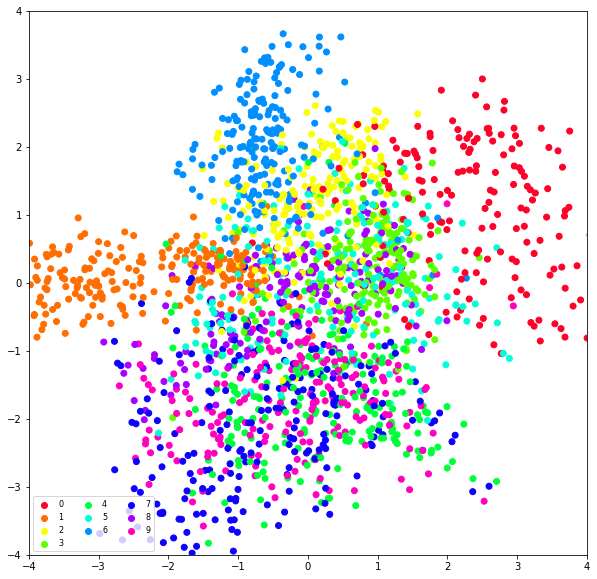

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

batch_size = 4
# batches to be forwarded, staticly set in autoencoder.c
n_batches = 500

zs = pd.read_csv(f"../latent_space.txt", delimiter=",", header=None).values[:,:-1]
mnist_raw = pd.read_csv("MNIST_data/mnist_train.csv", delimiter=",", header=None).values[:batch_size*n_batches,0]
print(f"zs.shape={zs.shape}")

x = []
y = []
c = []
for i in range(zs.shape[0]):
    for i2 in range(0, batch_size*2, 2):
        x.append(zs[i][i2])
        y.append(zs[i][i2+1])
        c.append(mnist_raw[int(i2/2)+i*batch_size])

colors = cm.gist_rainbow(np.linspace(0, 1, 10))

for i in range(len(c)):
    c[i] = colors[c[i]]
    
color_scatters = ()
for ce in colors:
    color_scatters = color_scatters + (plt.scatter([], [], c=ce),)

plt.legend(color_scatters,
       range(10),
       scatterpoints=1,
       loc='lower left',
       ncol=3,
       fontsize=8)

pc = plt.scatter(x, y, c=c)

pc.axes.set_xlim((-4,4))
pc.axes.set_ylim((-4,4))

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

#plt.savefig('latnet_space_visualization.pdf', dpi=200)



#for i in range(4):
#    plt.imshow(inputs[14][i].reshape([28,28]), cmap='gray')
#    plt.show()
#    plt.imshow(outputs[14][i].reshape([28,28]), cmap='gray')
#    plt.show()

### generate images from sampling output

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.misc
plt.rcParams['figure.figsize'] = [18, 10]

inputs = []
outputs = []

epochs = 169
batch_size = 1
img_num = 0
for i in range(epochs):
    input_array = pd.read_csv(f"train-output/sampling_input_{i}.txt", delimiter=",", header=None).values[:,:-1]
    output_array = pd.read_csv(f"train-output/sampling_output_{i}.txt", delimiter=",", header=None).values[:,:-1]
    scipy.misc.imsave(f"train-output/images/{img_num}.png", output_array.reshape([28,28]))
    print("%f, %f saved as %d" % (input_array[0][0], input_array[0][1], img_num))
    img_num = img_num + 1
